<a href="https://colab.research.google.com/github/decipher-code/spam-classifier/blob/main/Email_sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
 df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
933,ham,What time you think you'll have it? Need to kn...,NaN,NaN,NaN
257,ham,Where are you lover ? I need you ...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN
5399,ham,And he's apparently bffs with carly quick now,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#so dropping
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
#rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4954,ham,Doing my masters. When will you buy a bb cos i...
1824,ham,Sent me ur email id soon
2471,ham,"sry can't talk on phone, with parents"
4292,ham,You best watch what you say cause I get drunk ...
961,spam,URGENT! We are trying to contact U. Todays dra...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

EDA

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


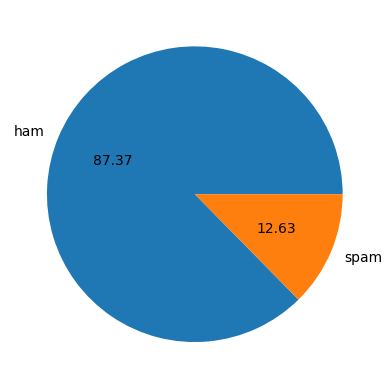

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk #library for nlp

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#try to get number of characters
df['characters']= df['text'].apply(len) #making new column , applied panda function apply

In [ ]:
#df.drop(columns=['characters_num'],inplace = True)

In [ ]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target']==0][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']==1][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

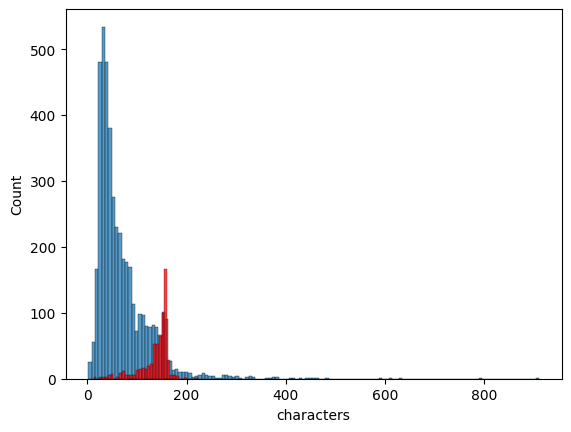

In [ ]:
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

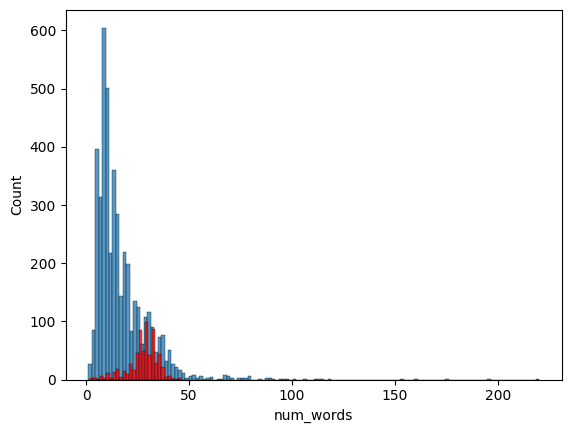

In [ ]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

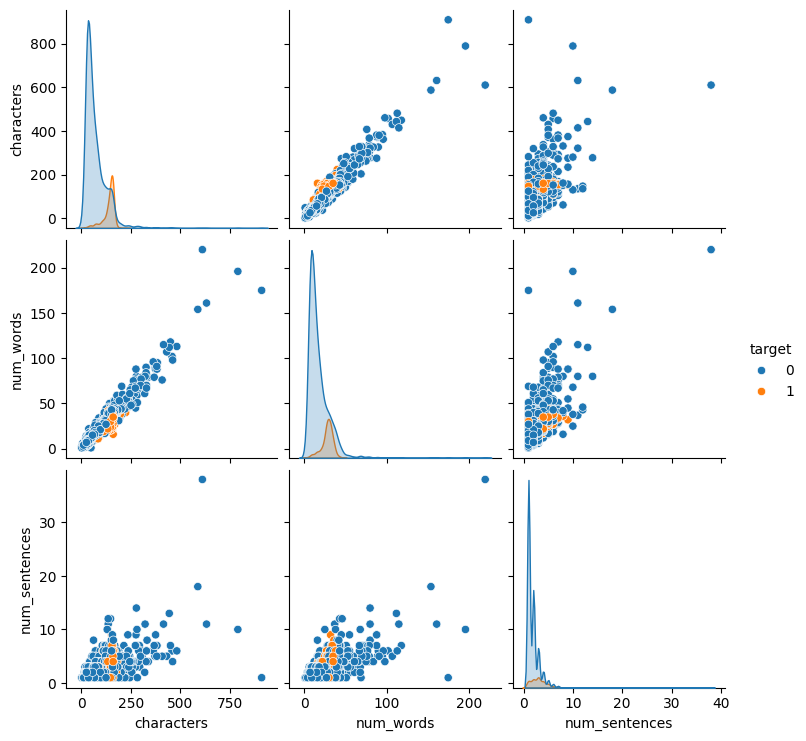

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

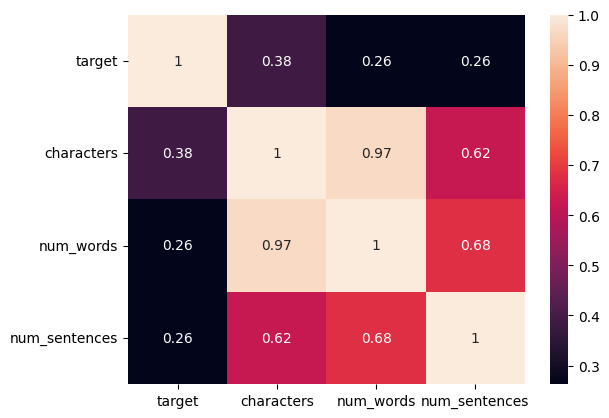

In [ ]:
#sns.heatmap(df.corr(),annot=True)
# Calculate the correlation matrix only for numerical features
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True)

In [ ]:
#data preprocessing


In [ ]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text =y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
import nltk
from nltk.corpus import stopwords #they are those whose existence in sentence doesnt change the actual meaning of it.

# Download the 'stopwords' dataset
nltk.download('stopwords')

#stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#making wordcloud to find max used words and visualising it
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

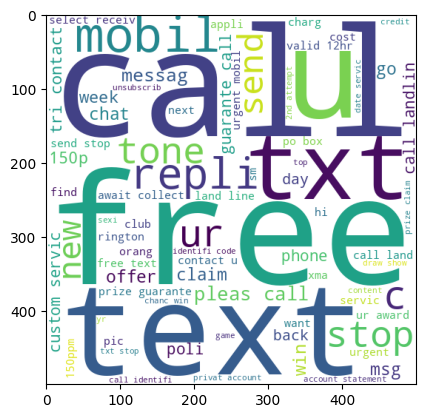

In [ ]:
#to display wordcloud
plt.imshow(spam_wc)

In [ ]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

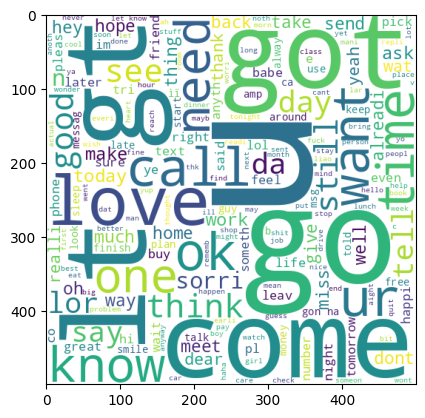

In [ ]:
plt.imshow(ham_wc)

In [ ]:
#to find exact 30 top words
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

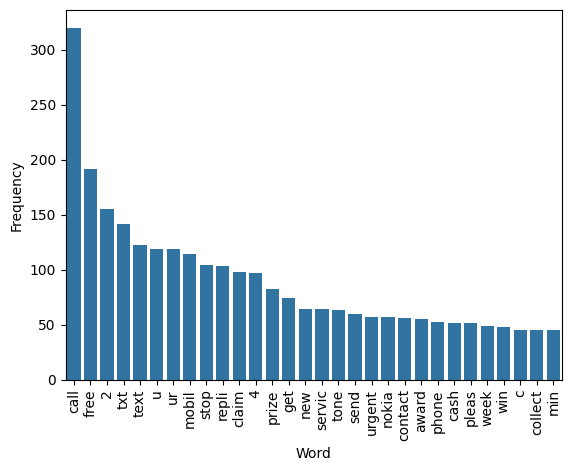

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Counter object to a DataFrame
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the 'x' and 'y' keyword arguments
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

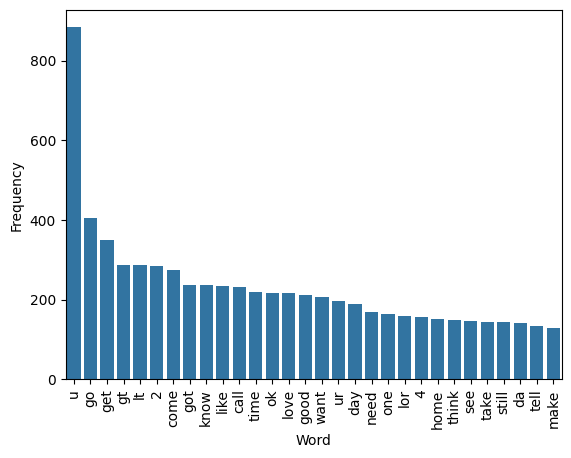

In [ ]:
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the 'x' and 'y' keyword arguments
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

Model

In [ ]:
!pip install scikit-learn

In [ ]:
#vectorising the textual data for model ie converting em in numbers somehow lets see
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf > cv

In [ ]:
# model improve

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
from google.colab import files
files.download('vectorizer.pkl')
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>